<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href="#Q1">Question 1</a></li>
<li><a href='#Q2'>Question 2</a></li>
<li><a href='#Q3'>Question 3</a></li>
<li><a href="#Q4">Question 4</a></li>
<li><a href='#Q5'>Question 5</a></li>
<li><a href='#Q6'>Question 6</a></li>
<li><a href="#Q7">Question 7</a></li>
<li><a href='#Q8'>Question 8</a></li>
<li><a href='#Q9'>Question 9</a></li>
<li><a href='#bonus1'>Bonus Question 1</a></li>
<li><a href='#bonus2'>Bonus Question 2</a></li>

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

<a id='imports'></a>
# IMPORTS:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization and tables
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats

# Datasets
from pydataset import data

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# .py files
import wrangle

<a id='Q1'></a>
# Question 1:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 1. Load your zillow dataset.

In [2]:
# Get prepared dataframes
train, validate, test = wrangle.wrangle_zillow()

# Obtain a smaller version of each df
train_sample = train.sample(int(len(train) * 0.001))
validate_sample = validate.sample(int(len(validate) * 0.001))
test_sample = test.sample(int(len(test) * 0.001))

train.shape:(1069116, 12)
validate.shape:(458193, 12)
test.shape:(381828, 12)


In [3]:
# Verify samples
train_sample.shape, validate_sample.shape, test_sample.shape

((1069, 12), (458, 12), (381, 12))

<a id='Q2'></a>
# Question 2:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the zillow dataset.

In [4]:
# Scale dfs and create a 'baseline' column
train_sample_scaled, validate_sample_scaled, test_sample_scaled = wrangle.scale(train_sample, validate_sample, test_sample)
train_sample_scaled['baseline'] = round(train_sample_scaled.assessedvalue.mean(), 0)
train_sample_scaled.sample()

,bedroomcnt,bathroomcnt,sqrft,assessedvalue,yearbuilt,taxamount,county_Los Angeles,county_Orange,county_Ventura,propertylandusedesc_Inferred Single Family Residential,propertylandusedesc_Single Family Residential,state_California,baseline
1776839,-0.231552,-0.081614,-0.89017,314978.0,1982,-0.297062,0,0,1,0,1,1,343361.0


In [5]:
# Create 'x' (Predictors) and 'y' (Target)
x_cols = [
    'sqrft'
]
y_cols = [
    'assessedvalue'
]

In [6]:
# Make the thing
lm = LinearRegression()

# Fit the thing
lm.fit(train_sample_scaled[x_cols], train_sample_scaled[y_cols])

# Use the thing
train_sample_scaled['yhat'] = np.round(lm.predict(train_sample_scaled[x_cols]))

In [7]:
train_sample_scaled.sample()

,bedroomcnt,bathroomcnt,sqrft,assessedvalue,yearbuilt,taxamount,county_Los Angeles,county_Orange,county_Ventura,propertylandusedesc_Inferred Single Family Residential,propertylandusedesc_Single Family Residential,state_California,baseline,yhat
1167109,-0.231552,-0.081614,-0.167969,838781.0,1953,2.209612,1,0,0,0,1,1,343361.0,324762.0


<a id='Q3'></a>
# Question 3:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 3. Plot the residuals for the linear regression model that you made.

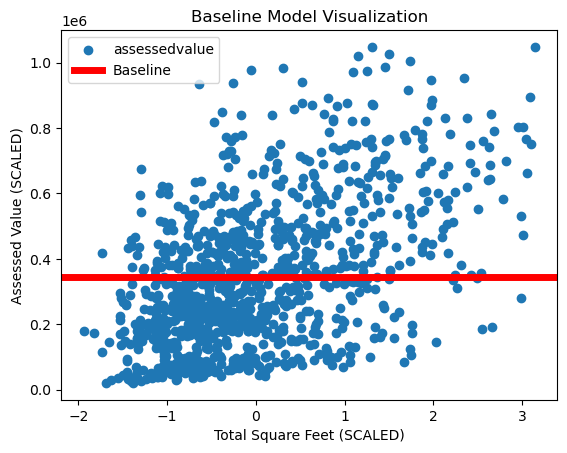

In [24]:
plt.scatter(data=train_sample_scaled, x='sqrft', y='assessedvalue')
plt.axhline(train_sample_scaled.assessedvalue.mean(), color='red', linewidth=5, label='Baseline')
plt.title('Baseline Model Visualization')
plt.xlabel('Total Square Feet (SCALED)')
plt.ylabel('Assessed Value (SCALED)')
plt.legend()
plt.show()

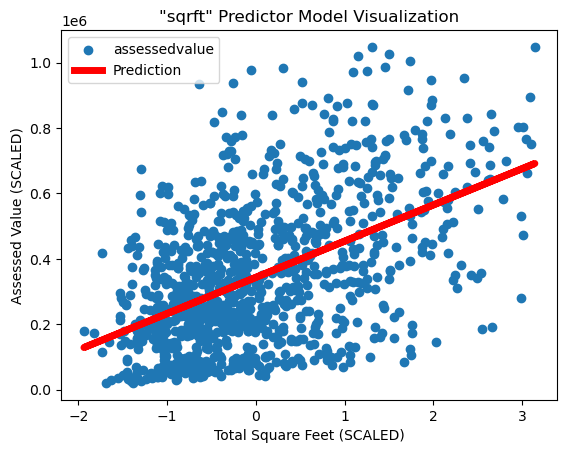

In [23]:
plt.scatter(data=train_sample_scaled, x='sqrft', y='assessedvalue')
plt.plot(train_sample_scaled[x_cols], train_sample_scaled['yhat'], color='red', linewidth=5, label='Prediction')
plt.title('"sqrft" Predictor Model Visualization')
plt.xlabel('Total Square Feet (SCALED)')
plt.ylabel('Assessed Value (SCALED)')
plt.legend()
plt.show()

<a id='Q4'></a>
# Question 4:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

- Residuals
    - Prediction - Actual
- SSE (Sum of Squared Errors)
    - Residuals, squared, summed
    - sum((yhat_residual ** 2))
    - sum((baseline_residual ** 2))
- ESS (Explained Sum of Square)
    - Pred/base, minus target mean, summed
    - sum((yhat - y.mean()) ** 2)
    - sum((baseline - y.mean()) ** 2)
- TSS (Total Sum of Squares)
    - SSE + ESS
- MSE (Mean Squared Error)
    - SSE / len(df)
- RMSE (Root Mean Squared Error)
    - MSE**.5

In [51]:
def get_eval_stats(df, actual_col, baseline_col, prediction_col):
    df['base_residual'] = df[baseline_col] - df[actual_col]
    df['pred_residual'] = df[prediction_col] - df[actual_col]
    SSE_base = (df.base_residual ** 2).sum()
    SSE_pred = (df.pred_residual ** 2).sum()
    SSE_diff = int(SSE_pred - SSE_base)
    ESS_base = sum((df[baseline_col] - df[actual_col]) ** 2)
    ESS_pred = sum((df[prediction_col] - df[actual_col]) ** 2)
    ESS_diff = int(ESS_pred - ESS_base)
    TSS_base = SSE_base + ESS_base
    TSS_pred = SSE_pred + ESS_pred
    TSS_diff = int(TSS_pred - TSS_base)
    MSE_base = SSE_base / len(df)
    MSE_pred = SSE_pred / len(df)
    MSE_diff = int(MSE_pred - MSE_base)
    RMSE_base = MSE_base ** .5
    RMSE_pred = MSE_pred ** .5
    RMSE_diff = int(RMSE_pred - RMSE_base)
    R2_base = ESS_base/TSS_base
    R2_pred = ESS_pred/TSS_pred
    R2_diff = R2_pred - R2_base
    print(f'\033[35m===== {baseline_col} =====\033[0m\n\033[32mSSE:\033[0m {SSE_base}\n\033[32mESS:\033[0m {ESS_base}\n\033[32mTSS:\033[0m {TSS_base}\n\033[32mMSE:\033[0m {MSE_base}\n\033[32mRMSE:\033[0m {RMSE_base}\n\033[32mR2:\033[0m {R2_base}\n')
    print(f'\033[35m===== {prediction_col} =====\033[0m\n\033[32mSSE:\033[0m {SSE_pred}\n\033[32mESS:\033[0m {ESS_pred}\n\033[32mTSS:\033[0m {TSS_pred}\n\033[32mMSE:\033[0m {MSE_pred}\n\033[32mRMSE:\033[0m {RMSE_pred}\n\033[32mR2:\033[0m {R2_pred}\n')
    print(f'\033[35m===== {prediction_col} - {baseline_col} =====\033[0m\n\033[32mSSE:\033[0m {SSE_diff}\n\033[32mESS:\033[0m {ESS_diff}\n\033[32mTSS:\033[0m {TSS_diff}\n\033[32mMSE:\033[0m {MSE_diff}\n\033[32mRMSE:\033[0m {RMSE_diff}\n\033[32mR2:\033[0m {R2_diff}\n')

In [52]:
get_eval_stats(train_sample_scaled, 'assessedvalue', 'baseline', 'yhat')

===== baseline =====
SSE: 50866422188499.0
ESS: 50866422188499.0
TSS: 101732844376998.0
MSE: 47583182589.80262
RMSE: 218135.6976512616
R2: 0.5

===== yhat =====
SSE: 37759349430678.0
ESS: 37759349430678.0
TSS: 75518698861356.0
MSE: 35322122947.31338
RMSE: 187941.8073428937
R2: 0.5

===== yhat - baseline =====
SSE: -13107072757821
ESS: -13107072757821
TSS: -26214145515642
MSE: -12261059642
RMSE: -30193
R2: 0.0



<a id='Q5'></a>
# Question 5:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [53]:
get_eval_stats(train_sample_scaled, 'assessedvalue', 'baseline', 'yhat')

===== baseline =====
SSE: 50866422188499.0
ESS: 50866422188499.0
TSS: 101732844376998.0
MSE: 47583182589.80262
RMSE: 218135.6976512616
R2: 0.5

===== yhat =====
SSE: 37759349430678.0
ESS: 37759349430678.0
TSS: 75518698861356.0
MSE: 35322122947.31338
RMSE: 187941.8073428937
R2: 0.5

===== yhat - baseline =====
SSE: -13107072757821
ESS: -13107072757821
TSS: -26214145515642
MSE: -12261059642
RMSE: -30193
R2: 0.0



<a id='Q6'></a>
# Question 6:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [54]:
get_eval_stats(train_sample_scaled, 'assessedvalue', 'baseline', 'yhat')

===== baseline =====
SSE: 50866422188499.0
ESS: 50866422188499.0
TSS: 101732844376998.0
MSE: 47583182589.80262
RMSE: 218135.6976512616
R2: 0.5

===== yhat =====
SSE: 37759349430678.0
ESS: 37759349430678.0
TSS: 75518698861356.0
MSE: 35322122947.31338
RMSE: 187941.8073428937
R2: 0.5

===== yhat - baseline =====
SSE: -13107072757821
ESS: -13107072757821
TSS: -26214145515642
MSE: -12261059642
RMSE: -30193
R2: 0.0



<a id='Q7'></a>
# Question 7:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 7. What is the amount of variance explained in your model?

In [55]:
r2_score(train_sample_scaled.assessedvalue, train_sample_scaled.yhat)

0.25767632544008523

<a id='Q8'></a>
# Question 8:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 8. Is your model better than the baseline model?

IT BE BETTAH

<a id='Q9'></a>
# Question 9:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### 9 . Create a file named evaluate.py that contains the following functions.

##### 9a. plot_residuals(y, yhat): creates a residual plot

##### 9b. regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)

##### 9c. baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

##### 9d. better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

<a id='bonus1'></a>
# Bonus Question 1:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Bonus - 1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [9]:
tips = data('tips')
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
166,24.52,3.48,Male,No,Sun,Dinner,3


<a id='bonus2'></a>
# Bonus Question 2:
<li><a href='#TableOfContents'>Table of Contents</a></li>

### Bonus - 2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [10]:
mpg = data('mpg')
mpg.sample()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
